**Sampling**

In [1]:
import pandas as pd
import numpy as np

In [2]:
# # upload actor.csv file
# from google.colab import files
# file_uploaded = files.upload()

In [3]:
top = pd.read_csv('top_movies_2017.csv')
top

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
1,Star Wars,Fox,460998007,1583483200,1977
2,The Sound of Music,Fox,158671368,1266072700,1965
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
4,Titanic,Paramount,658672302,1204368000,1997
...,...,...,...,...,...
195,9 to 5,Fox,103290500,341357800,1980
196,Batman v Superman: Dawn of Justice,Warner Brothers,330360194,340137000,2016
197,The Firm,Paramount,158348367,340028200,1993
198,Suicide Squad,Warner Brothers,325100054,339411900,2016


In [4]:
# Deterministic Sample
top.iloc[[3, 18, 100], :]

,Title,Studio,Gross,Gross (Adjusted),Year
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
18,The Lion King,Buena Vista,422783777,792511700,1994
100,The Hunger Games,Lionsgate,408010692,452174400,2012


In [5]:
# Deterministic Sample
top.loc[top.Title.str.contains('Harry Potter', regex=False)]

,Title,Studio,Gross,Gross (Adjusted),Year
74,Harry Potter and the Sorcerer's Stone,Warner Brothers,317575550,497066400,2001
114,Harry Potter and the Deathly Hallows Part 2,Warner Brothers,381011219,426630300,2011
131,Harry Potter and the Goblet of Fire,Warner Brothers,290013036,401608200,2005
133,Harry Potter and the Chamber of Secrets,Warner Brothers,261988482,399302200,2002
154,Harry Potter and the Order of the Phoenix,Warner Brothers,292004738,377314200,2007
175,Harry Potter and the Half-Blood Prince,Warner Brothers,301959197,359788300,2009
177,Harry Potter and the Prisoner of Azkaban,Warner Brothers,249541069,357233500,2004


In [6]:
"""Choose a random start among rows 0 through 9;
then take every 10th row."""

start = np.random.choice(np.arange(10))
top.iloc[np.arange(start, len(top), 10), :]

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
10,Star Wars: The Force Awakens,Buena Vista,936662225,961143200,2015
20,Raiders of the Lost Ark,Paramount,248159971,787003100,1981
30,The Dark Knight,Warner Brothers,534858444,661980500,2008
40,Pinocchio,Disney,84254167,599215600,1940
50,Blazing Saddles,Warner Brothers,119601481,562200300,1974
60,My Fair Lady,Warner Brothers,72000000,533400000,1964
70,Smokey and the Bandit,Universal,126737428,505244700,1977
80,The Best Years of Our Lives,RKO,23650000,488950000,1946
90,M.A.S.H.,Fox,81600000,477252600,1970


**Distributions**


In [7]:
# Define all possible results
die = pd.DataFrame({'Face': np.arange(1, 7, 1)})
die

,Face
0,1
1,2
2,3
3,4
4,5
5,6


In [8]:
die_bins = np.arange(0.5, 6.6, 1)
die_bins

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

c:\Users\rnjsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


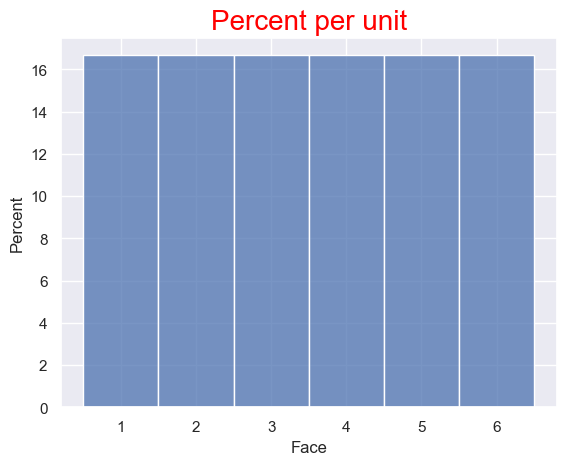

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
ax=sns.histplot(data=die, x="Face", bins=die_bins, stat="percent", discrete=True )

ax.set_title("Percent per unit", size=20, color="red")
plt.show()


In [10]:
# Numpy np.random.choice
# rng = random number generator, seed 2003
rng = np.random.default_rng(2023)
rng.choice(die.Face, 10, replace=True)

array([3, 1, 1, 2, 2, 1, 4, 3, 2, 5])

In [11]:
# Pandas pd.DataFrame.sample
die.sample(n=10, replace=True, random_state=2023)

,Face
1,2
1,2
4,5
3,4
4,5
4,5
5,6
0,1
1,2
5,6


In [12]:
# Define Empirical Histogram Function
def empirical_hist_die(n):
    # Run one experiment
    die_sample = die.sample(n=n, replace=True, random_state=2023)

    # set die bins
    die_bins = np.arange(0.5, 6.6, 1)
    # Define Empirical Histogram
    sns.set_theme(style="darkgrid")
    fig, ax = plt.subplots()
    ax=sns.histplot(data=die_sample, x="Face", bins=die_bins, stat="percent", discrete=True )

    ax.set_title("Sample size =" + str(n))
    plt.show()

c:\Users\rnjsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


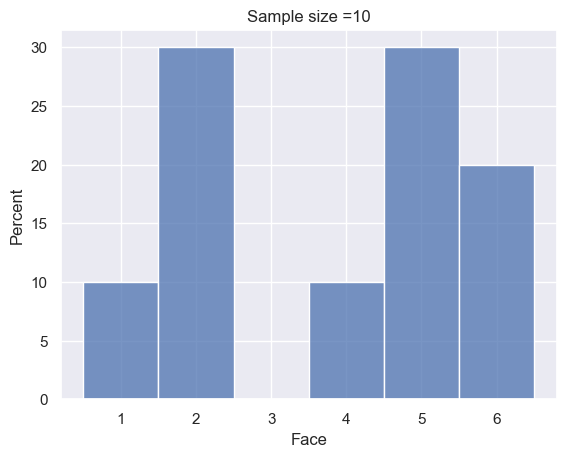

In [13]:
empirical_hist_die(10)

c:\Users\rnjsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


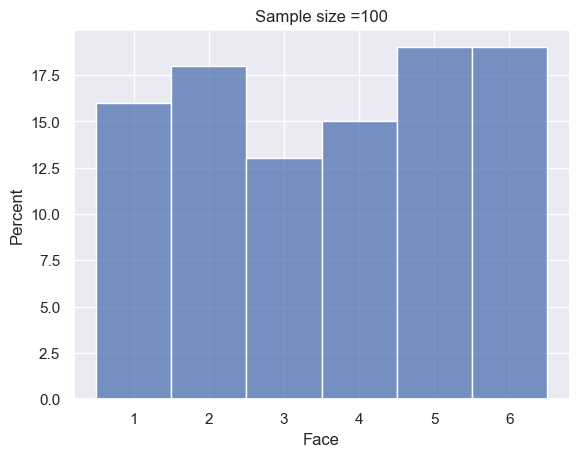

In [14]:
empirical_hist_die(100)

c:\Users\rnjsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


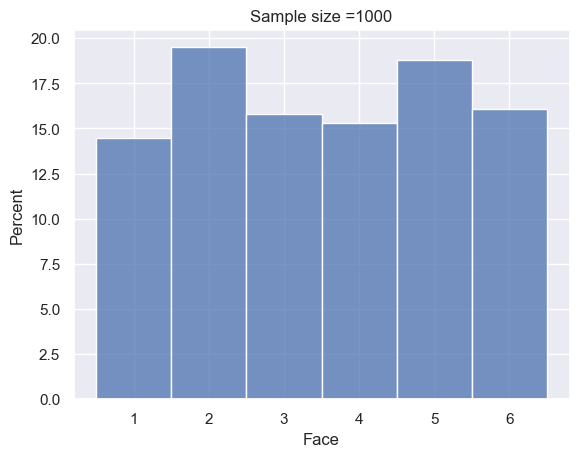

In [15]:
empirical_hist_die(1000)

**Large Random Samples**

In [16]:
# # upload actor.csv file
# from google.colab import files
# file_uploaded = files.upload()

In [17]:
united = pd.read_csv('united_summer2015.csv')
united

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


In [18]:
united.Delay.min()

-16

In [19]:
united.Delay.max()

580

In [20]:
delay_bins = np.append(np.arange(-20, 301, 10), 600)
delay_bins

array([-20, -10,   0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100,
       110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230,
       240, 250, 260, 270, 280, 290, 300, 600])

In [21]:
# Construct bins and Delay Count
bins = united.groupby(pd.cut(united['Delay'], delay_bins, right=False))
bins = pd.DataFrame(bins['Delay'].count().reset_index(name='Delay Count'))
bins.rename(columns={'Delay': 'bins'}, inplace=True)
bins

C:\Users\rnjsa\AppData\Local\Temp\ipykernel_13552\35960793.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bins = united.groupby(pd.cut(united['Delay'], delay_bins, right=False))


,bins,Delay Count
0,"[-20, -10)",55
1,"[-10, 0)",4994
2,"[0, 10)",4059
3,"[10, 20)",1445
4,"[20, 30)",773
5,"[30, 40)",590
6,"[40, 50)",357
7,"[50, 60)",301
8,"[60, 70)",216
9,"[70, 80)",192


In [22]:
# Define population. Since we only extract -20 < Delay < 201, we set this part of data as population.
data_amount = len(united[(-20 < united['Delay']) & (united['Delay'] < 600)])

# Add percent data to bins
bins['Percent %'] = round(bins['Delay Count']/data_amount*100, 3)
bins

,bins,Delay Count,Percent %
0,"[-20, -10)",55,0.398
1,"[-10, 0)",4994,36.123
2,"[0, 10)",4059,29.360
3,"[10, 20)",1445,10.452
4,"[20, 30)",773,5.591
5,"[30, 40)",590,4.268
6,"[40, 50)",357,2.582
7,"[50, 60)",301,2.177
8,"[60, 70)",216,1.562
9,"[70, 80)",192,1.389


c:\Users\rnjsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


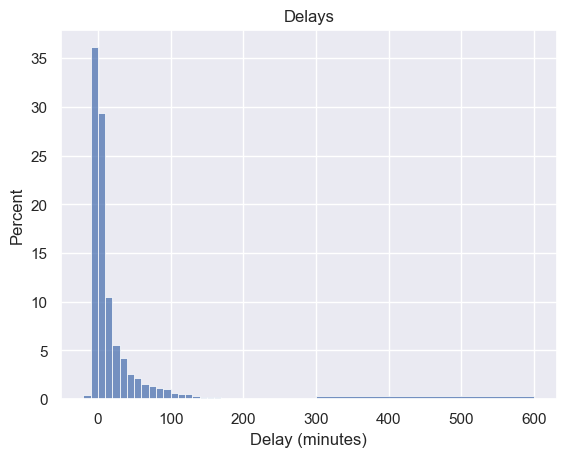

In [23]:
delay_bins = np.append(np.arange(-20, 301, 10), 600)
# draw histogram
fig, ax = plt.subplots()
ax=sns.histplot(data=united, x="Delay", bins=delay_bins, stat="percent", discrete=False)
ax.set_ylabel("Percent")
ax.set_xlabel("Delay (minutes)")
ax.set_title("Delays")

plt.show()

In [24]:
# Define Empirical Histogram Function
def empirical_hist_delay(n):
    # Extract sample
    united_sample = united.sample(n=n, replace=True, random_state=2023)

    # set delays_bins, only consider minutes in  -20 < delay <= 200
    delay_bins = np.arange(-20, 201, 10)
    # draw histogram
    fig, ax = plt.subplots()
    ax=sns.histplot(data=united_sample, x="Delay", bins=delay_bins, stat="percent", discrete=False)
    ax.set_ylabel("Percent")
    ax.set_xlabel("Delay (minutes)")
    ax.set_title('Sample Size = ' + str(n))

    plt.show()

c:\Users\rnjsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


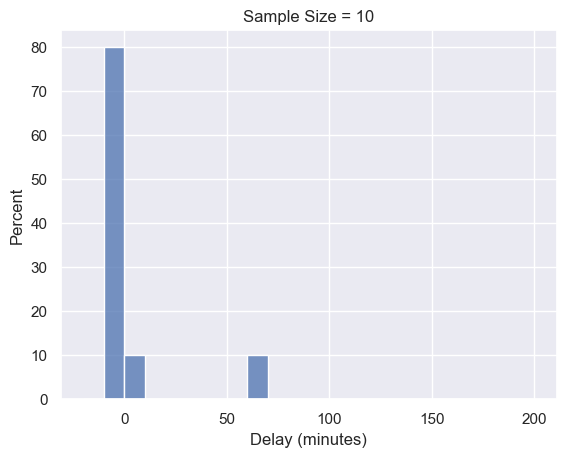

In [25]:
empirical_hist_delay(10)

c:\Users\rnjsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


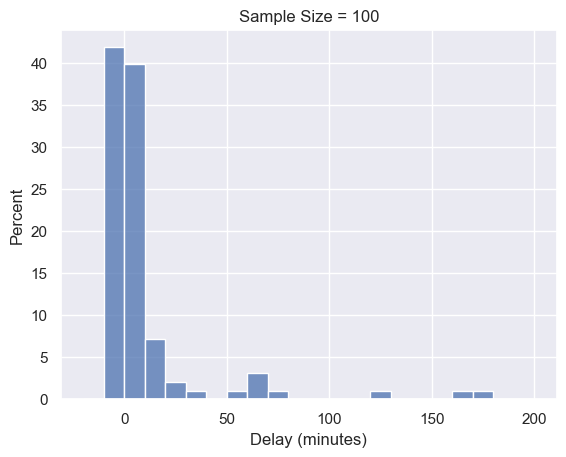

In [26]:
empirical_hist_delay(100)

c:\Users\rnjsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


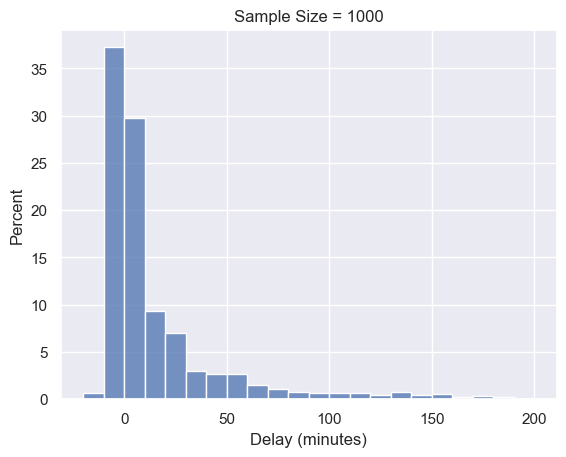

In [27]:
empirical_hist_delay(1000)

**Simulating Statistics**

In [28]:
united = pd.read_csv('united_summer2015.csv')
united

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
...,...,...,...,...
13820,8/31/15,1978,LAS,-4
13821,8/31/15,1993,IAD,8
13822,8/31/15,1994,ORD,3
13823,8/31/15,2000,PHX,-1


In [29]:
# Median of Delay
np.median(united.Delay)
# 2.0

2.0

In [30]:
# Percentage of Delay that is lower or equal than 2.0
len(united.loc[united.Delay <= 2.0])/len(united)
# 0.5018444846292948

0.5018444846292948

In [31]:
# Amount of Delay that equal than 2.0
len(united.loc[united.Delay == 2.0])

480

In [32]:
# Define sample_1000
sample_1000 = united.Delay.sample(n=1000, replace=True)

# Median of smaple_1000
np.median(sample_1000)


3.0

In [33]:
# Median of another 1000 sample from united
np.median(united.sample(n=1000, replace=True).Delay)
# 2.0

4.0

In [34]:
# Define function to generate one value of the statistic
def random_sample_median(size):
    return np.median(united.sample(n=size, replace=True).Delay)

In [35]:
# Create Array medians to store repitions
medians = np.array([])

# Repeat the function 5,000 times.
for i in np.arange(5000):
    medians = np.append(medians, random_sample_median(1000))

In [36]:
# Createa DataFrame
simulated_medians = pd.DataFrame({'Sample Median': medians})
simulated_medians

,Sample Median
0,2.0
1,2.0
2,3.0
3,2.5
4,3.0
...,...
4995,2.0
4996,2.0
4997,3.0
4998,2.0


c:\Users\rnjsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


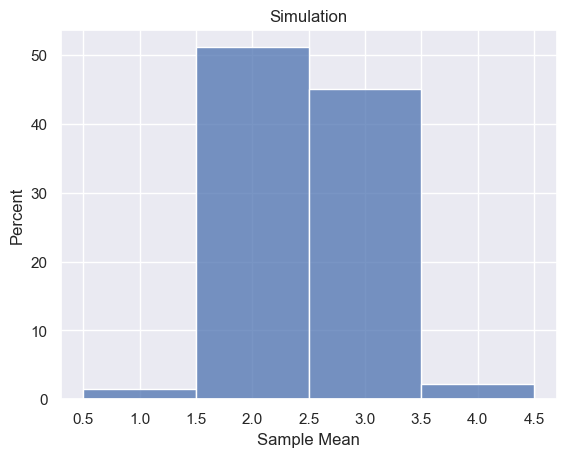

In [37]:
# draw histogram
median_bins = np.arange(0.5, 5, 1)
fig, ax = plt.subplots()
ax=sns.histplot(data=simulated_medians, x="Sample Median", bins=median_bins, stat="percent", discrete=True)
ax.set_ylabel("Percent")
ax.set_xlabel("Sample Mean")
ax.set_title("Simulation")
plt.show()

In [38]:
# Create Array medians to store repitions
medians = np.array([])

# Repeat the function 5,000 times.
for i in np.arange(5000):
    medians = np.append(medians, random_sample_median(10))

In [39]:
# Createa DataFrame
simulated_medians_10 = pd.DataFrame({'Sample Median': medians})
simulated_medians_10

,Sample Median
0,8.0
1,0.0
2,-2.5
3,7.0
4,6.0
...,...
4995,24.0
4996,8.5
4997,5.5
4998,25.0


c:\Users\rnjsa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


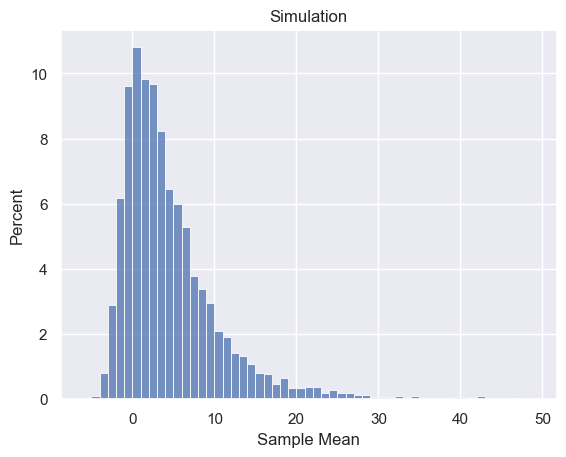

In [40]:
# draw histogram
fig, ax = plt.subplots()
ax=sns.histplot(data=simulated_medians_10, x="Sample Median", bins=50, stat="percent", discrete=True)
ax.set_ylabel("Percent")
ax.set_xlabel("Sample Mean")
ax.set_title("Simulation")
plt.show()